In [9]:
# Install YOLOv8 from Ultralytics
%pip install ultralytics==8.0.20
!export PATH=/home/cleoxia1/.local/bin:$PATH

# Check GPU info
%cd /home/cleoxia1/Labs/headCount
!nvidia-smi

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
/home/cleoxia1/Labs/headCount
Sat Dec  2 22:24:26 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TCBsNOYUEBBmbox9rfUM")
project = rf.workspace("senecacv2023").project("head-count-ko384")

# Specify Version to Download
%cd /home/cleoxia1/Labs/headCount
dataset = project.version(2).download("yolov8")


Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
/home/cleoxia1/Labs/headCount
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Head-Count-2 in yolov8:: 100%|██████████| 84/84 [00:00<00:00, 5209.01it/s]


In [11]:
# PreTrained Dataset Parameters / Using Smallest 8n model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("/home/cleoxia1/Labs/headCount/runs/detect/train10/weights/best.pt")  # load a pretrained model (Transferred Learning from previous experience) 


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [12]:
# Train the Model
%cd /home/cleoxia1/Labs/headCount
model.train(data="/home/cleoxia1/Labs/headCount/Head-Count-1/data.yaml", epochs=200, batch=16, patience=0)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6073MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/cleoxia1/Labs/headCount/Head-Count-1/data.yaml, epochs=200, patience=0, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

/home/cleoxia1/Labs/headCount


Transferred 355/355 items from pretrained weights
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias
train: Scanning /home/cleoxia1/Labs/headCount/Head-Count-1/train/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: Scanning /home/cleoxia1/Labs/headCount/Head-Count-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/200      2.65G      1.097     0.7425      1.019        152        640: 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]
                   all          6         69      0.951      0.884

/home/cleoxia1/Labs/headCount/runs/detect/train11


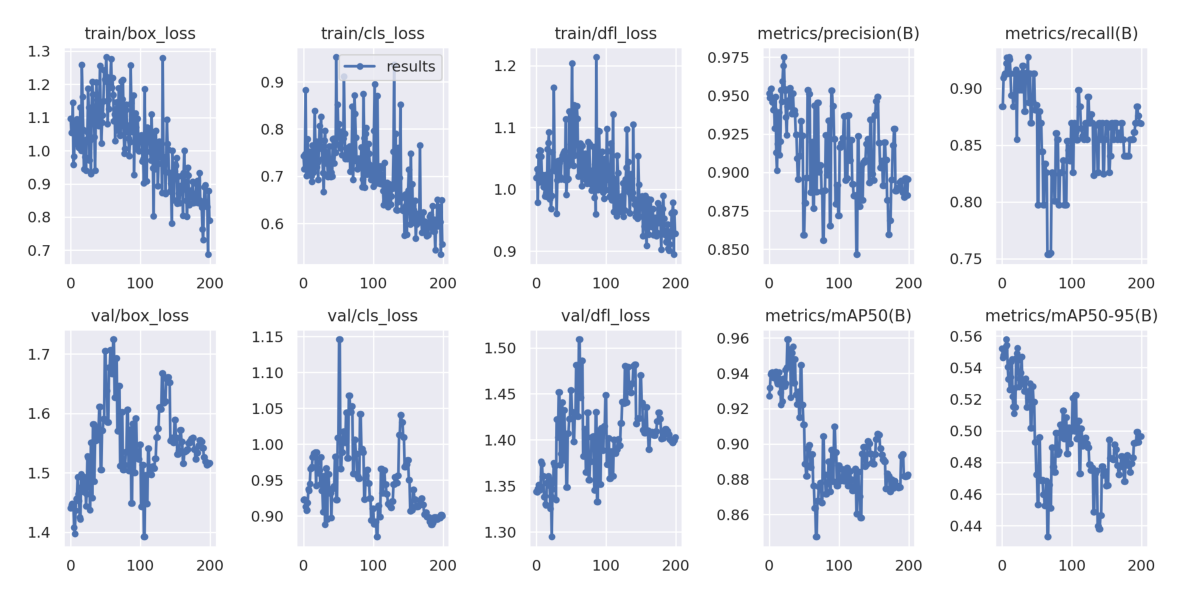

In [13]:
import matplotlib.pyplot as plt

%cd /home/cleoxia1/Labs/headCount/runs/detect/train11
Overall = plt.imread('results.png')
fig = plt.figure(figsize=(15, 15))
plt.imshow(Overall)
plt.axis('off')
plt.show()

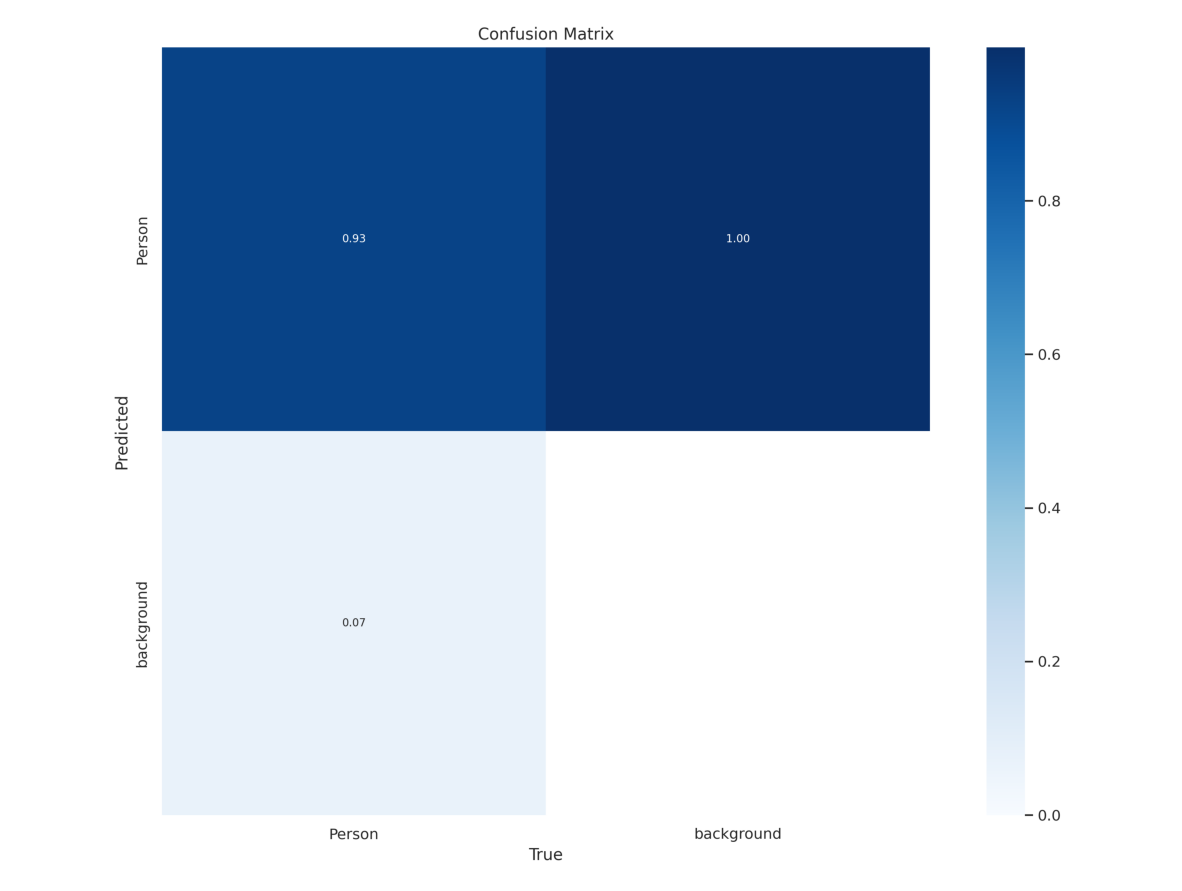

In [16]:
ConfusionMatrix = plt.imread('confusion_matrix.png')
fig = plt.figure(figsize=(15, 15))
plt.imshow(ConfusionMatrix)
plt.axis('off')
plt.show()

In [17]:
# setting the version variable
from roboflow import Roboflow
rf = Roboflow(api_key="TCBsNOYUEBBmbox9rfUM")
project = rf.workspace("senecacv2023").project("head-count-ko384")

%cd /home/cleoxia1/Labs/headCount/
version = project.version(2)
model_path = "runs/detect/train11/"
version.deploy("yolov8", model_path)

loading Roboflow workspace...
loading Roboflow project...
/home/cleoxia1/Labs/headCount
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/senecacv2023/head-count-ko384/2
Share your model with the world at: https://universe.roboflow.com/senecacv2023/head-count-ko384/model/2
